In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv("/content/netflix_titles1.csv")

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


In [ ]:
df.shape

(8807, 12)



---


**The above code shows the total number of rows and columns.**


---



In [ ]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')



---


### **Therefore, it is clear that this dataset contains 12 columns for exploratory analysis and visualisations.**


---



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB




---


**As we can see in the above code , some of the columns have null values as the count does not match with the total number of records(8807)**


---
*Let us find the exact number of null values*




---




In [ ]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
print(f'Number of missing values in DataFrame:\n{df.isnull().sum()}')

Number of missing values in DataFrame:
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [ ]:
for i in df.columns:
    null_rate = df[i].isna().sum() / len(df) * 100
    if null_rate > 0 :
        print("{} null rate: {}%".format(i,round(null_rate,2)))

director null rate: 29.91%
cast null rate: 9.37%
country null rate: 9.44%
date_added null rate: 0.11%
rating null rate: 0.05%
duration null rate: 0.03%




---


**As we can see from the above code, There are 5 columns which contain null values with the 'Director' column missing almost one-third of its data.**


---



**Now let us also check for duplicate values if any**


---



In [ ]:
df.duplicated().sum()

0

*No duplicate Values present*



---


## **Dealing with the missing values**


---
**Dealing with missing data is crucial in data analysis for several reasons:**


1.   Prevents Biased or Misleading Results
2.   Enhances Data Quality:
3.   Facilitates Data Exploration
4.   Avoids Selection Bias
5.   Improves Model Performance






---



In [ ]:
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)



---


Rating column has some incorrect data like '74 min' , '84 min' , therefore let us replace those data with the correct ratings.(taking mode of the data)


---


Also there is no such rating as TV-Y7-FV therefore replacing it with TV-Y7.


---



In [ ]:
df['rating'].mode()

0    TV-MA
Name: rating, dtype: object

In [ ]:
df['rating'] = df['rating'].replace({'74 min': 'TV-MA', '84 min': 'TV-MA', '66 min': 'TV-MA'})
df['rating'] = df['rating'].replace({'TV-Y7-FV': 'TV-Y7'})



---


**Replacing the null records of ratings with the mode of the data 'TV_MA'**


---



In [ ]:
df['rating'].replace(np.nan, 'TV-MA',inplace  = True)



---


**Renaming vaules for Rating for better understanding**


---



In [ ]:
df['rating'] = df['rating'].replace({
                'PG-13': 'Teens - Age above 12',
                'TV-MA': 'Adults',
                'PG': 'Kids - with parental guidence',
                'TV-14': 'Teens - Age above 14',
                'TV-PG': 'Kids - with parental guidence',
                'TV-Y': 'Kids',
                'TV-Y7': 'Kids - Age above 7',
                'R': 'Adults',
                'TV-G': 'Kids',
                 'G': 'Kids',
                'NC-17': 'Adults',
                'NR': 'NR',
                'UR' : 'UR'

})

In [ ]:
df['rating'].unique()

array(['Teens - Age above 12', 'Adults', 'Kids - with parental guidence',
       'Teens - Age above 14', 'Kids', 'Kids - Age above 7', 'NR', 'UR'],
      dtype=object)

In [ ]:
df['duration'].unique()

array(['90 min', '2 Seasons', '1 Season', '91 min', '125 min',
       '9 Seasons', '104 min', '127 min', '4 Seasons', '67 min', '94 min',
       '5 Seasons', '161 min', '61 min', '166 min', '147 min', '103 min',
       '97 min', '106 min', '111 min', '3 Seasons', '110 min', '105 min',
       '96 min', '124 min', '116 min', '98 min', '23 min', '115 min',
       '122 min', '99 min', '88 min', '100 min', '6 Seasons', '102 min',
       '93 min', '95 min', '85 min', '83 min', '113 min', '13 min',
       '182 min', '48 min', '145 min', '87 min', '92 min', '80 min',
       '117 min', '128 min', '119 min', '143 min', '114 min', '118 min',
       '108 min', '63 min', '121 min', '142 min', '154 min', '120 min',
       '82 min', '109 min', '101 min', '86 min', '229 min', '76 min',
       '89 min', '156 min', '112 min', '107 min', '129 min', '135 min',
       '136 min', '165 min', '150 min', '133 min', '70 min', '84 min',
       '140 min', '78 min', '7 Seasons', '64 min', '59 min', '139 min',
    

In [ ]:
result = df[df['duration'].isnull()]
result_final = result['type']
print(result_final)

5541    Movie
5794    Movie
5813    Movie
Name: type, dtype: object




---


**As we can see the records with missing values in 'duration' column are all of the 'type' Movies and there are only 3 null values we will drp those values.**


---



In [ ]:
df = df.dropna(subset=['duration'])




---


**Country - Replacing the null values with the most common country**

**Director,Cast - Replacing the null values with 'No Data' as people would still watch the movie if it is interesting.**


---



In [ ]:
df['country'] = df['country'].fillna(df['country'].mode()[0])
df['cast'].replace(np.nan, 'No Data',inplace  = True)
df['director'].replace(np.nan, 'No Data',inplace  = True)

<ipython-input-196-acc85f23f6b1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country'] = df['country'].fillna(df['country'].mode()[0])
<ipython-input-196-acc85f23f6b1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cast'].replace(np.nan, 'No Data',inplace  = True)
<ipython-input-196-acc85f23f6b1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['director'].repla

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8804 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8804 non-null   object
 1   type          8804 non-null   object
 2   title         8804 non-null   object
 3   director      8804 non-null   object
 4   cast          8804 non-null   object
 5   country       8804 non-null   object
 6   date_added    8794 non-null   object
 7   release_year  8804 non-null   int64 
 8   rating        8804 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8804 non-null   object
 11  description   8804 non-null   object
dtypes: int64(1), object(11)
memory usage: 894.2+ KB




---


**Dropping the record with null values of date added as very low percentage of null rate.**


---



In [ ]:
df = df.dropna(subset=['date_added'])

In [ ]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

*All the null values are dealt with.*


---





*  Modifying the date_added column
*  Creating two new columns

**This helps in easier manipulation and analysis of the date-related data.**





In [ ]:
df['date_added']= pd.to_datetime(df['date_added'])
df['month_added'] = (df['date_added']).dt.month_name()
df['year_added'] = (df['date_added']).dt.year


In [ ]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,2021-09-25,2020,Teens - Age above 12,90 min,Documentaries,"As her father nears the end of his life, filmm...",September,2021
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,Adults,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",September,2021




---


# **Data Visualizations**


---



## **Analysis of Movies vs TV Shows**

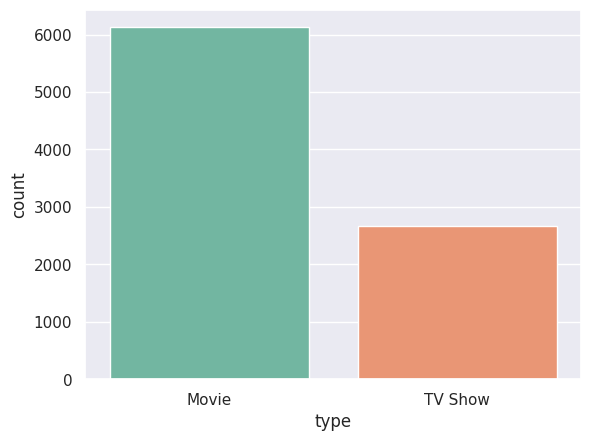

In [ ]:
sns.set(style="darkgrid")
ax = sns.countplot(x="type", data=df, palette="Set2")

**From the above graph we can see that there are more Movies than TV Show on Netflix**

### **Movie and TV show ratings analysis**

[Text(0, 0, 'Adults'),
 Text(1, 0, 'Teens - Age above 14'),
 Text(2, 0, 'Kids - with parental guidence'),
 Text(3, 0, 'Kids'),
 Text(4, 0, 'Teens - Age above 12'),
 Text(5, 0, 'Kids - Age above 7'),
 Text(6, 0, 'NR'),
 Text(7, 0, 'UR')]

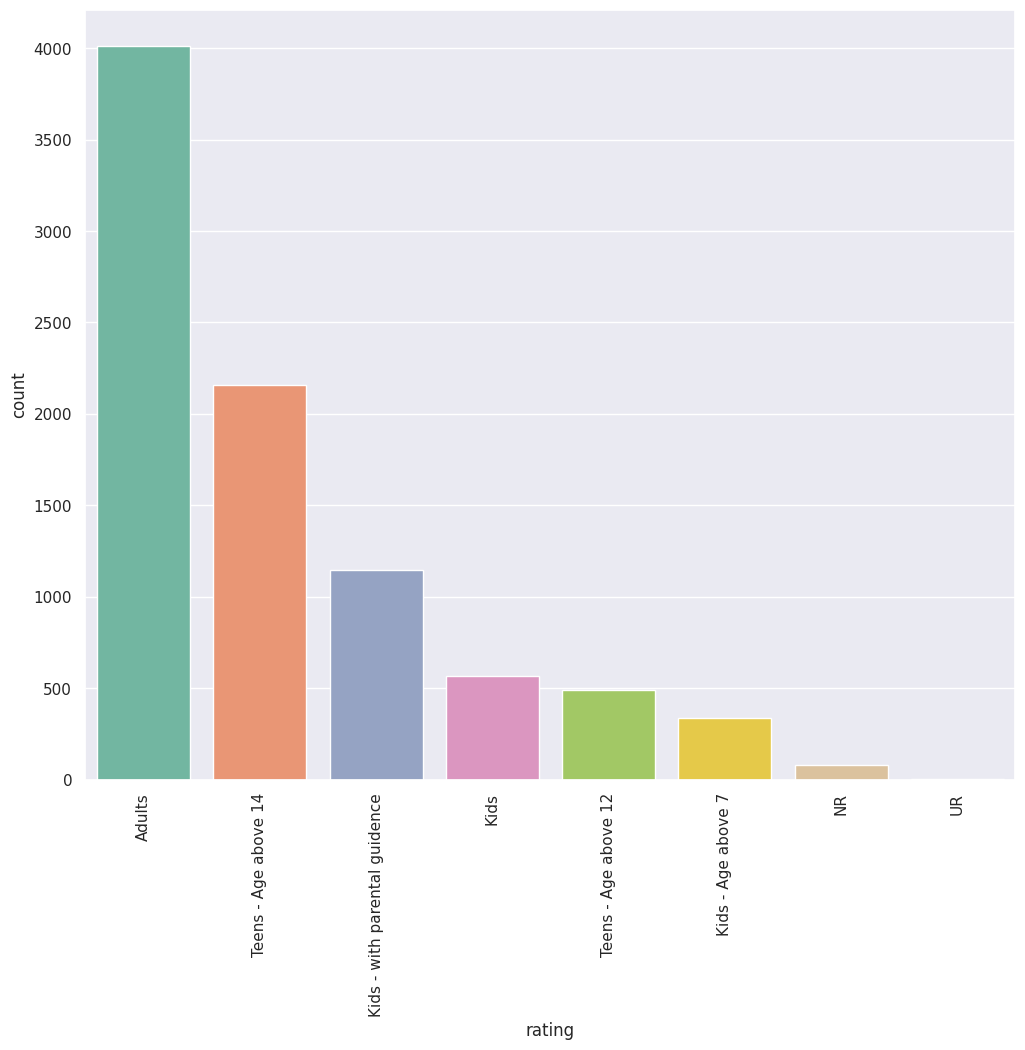

In [ ]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="rating", data=df, palette="Set2", order=df['rating'].value_counts().index[0:15])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)



---


The largest count of the movies and TV-shows are made with the ratings appropriate for mature audiences only.

The Second largest count is for teenagers above 14.


---



### *Pie chart for ratings*

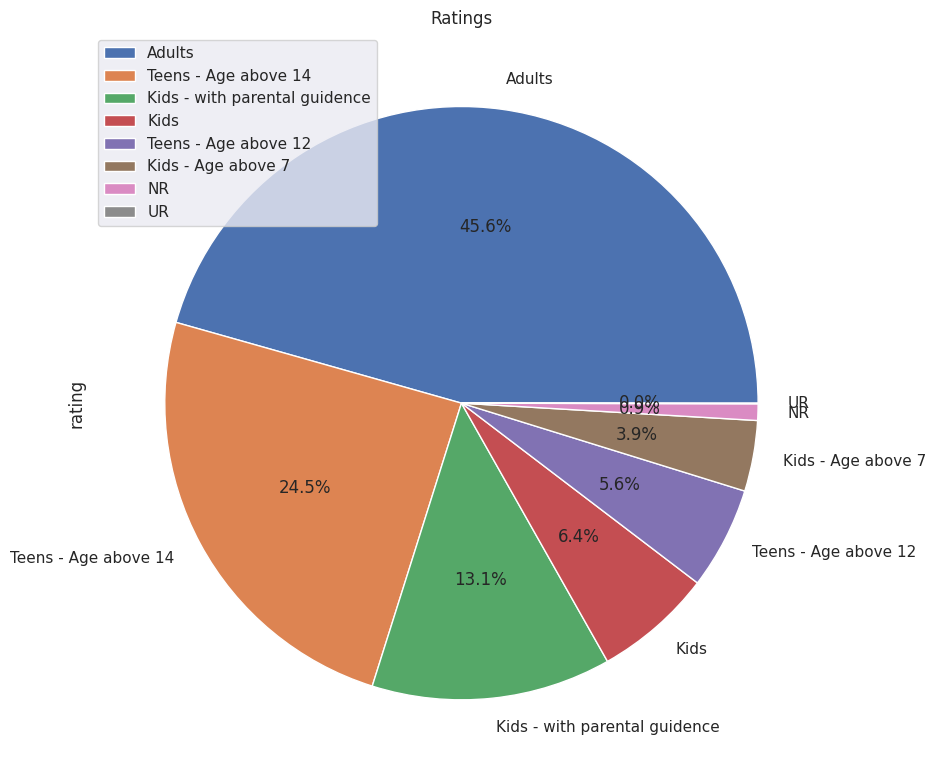

In [ ]:
df['rating'].value_counts().plot.pie(autopct='%1.1f%%',shadow=False,figsize=(10,8))
plt.title('Ratings')
plt.legend(loc = "upper left")
plt.tight_layout()
plt.show()

**Relation between type and ratings**

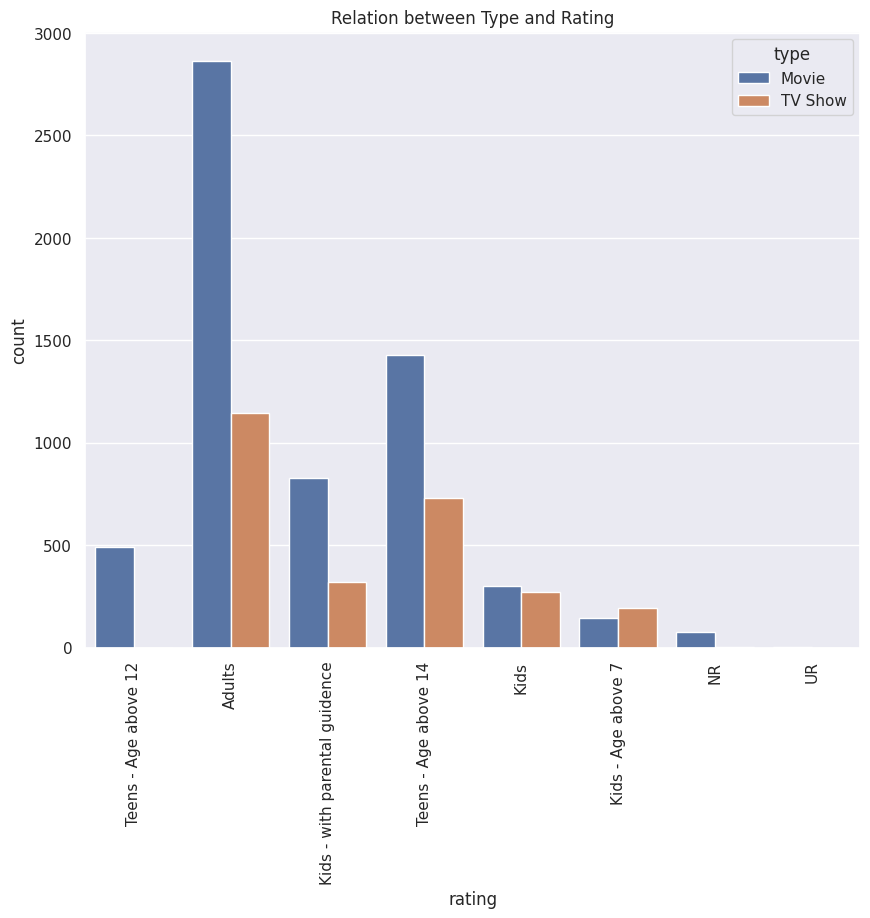

In [ ]:
plt.figure(figsize=(10,8))
ax = sns.countplot(x='rating',hue='type',data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title('Relation between Type and Rating')
plt.show()

**Year wise analysis**

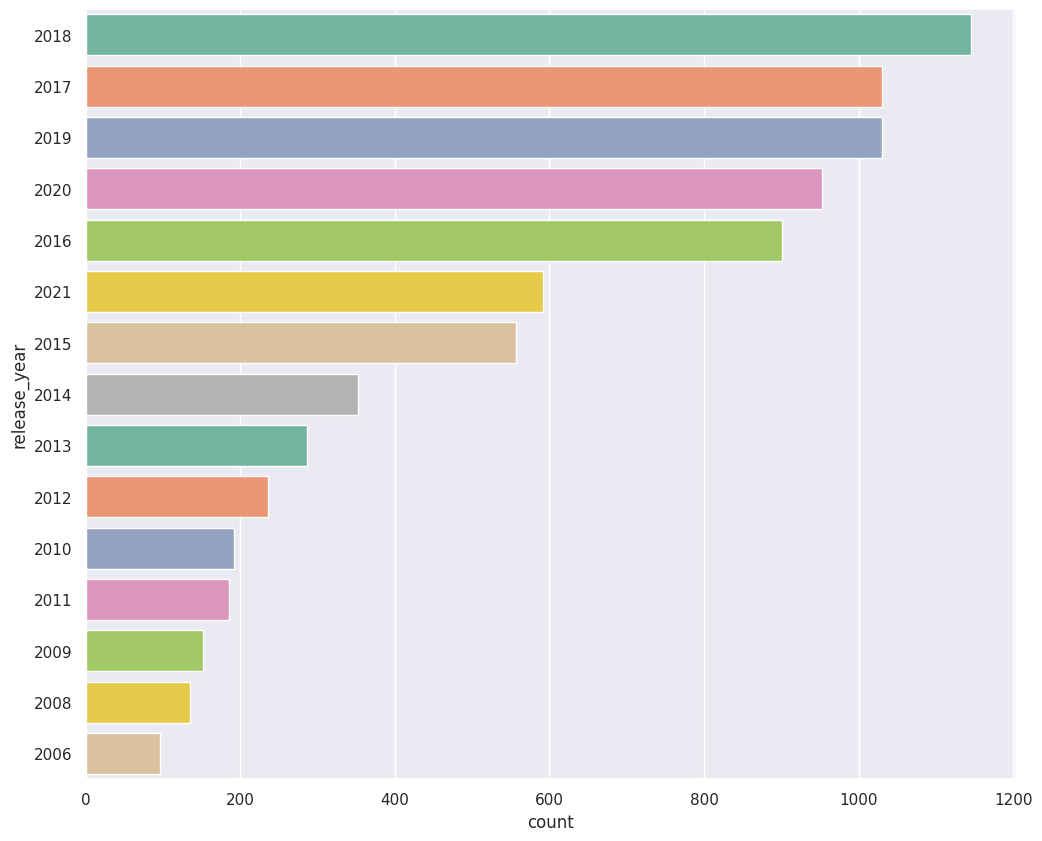

In [ ]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="release_year", data=df, palette="Set2", order=df['release_year'].value_counts().index[0:15])

### **Analysis on the basis of countries**

In [ ]:
country_count=df['country'].value_counts().sort_values(ascending=False)
country_count=pd.DataFrame(country_count)
topcountries=country_count[0:11]
topcountries

,country
United States,3639
India,972
United Kingdom,418
Japan,244
South Korea,199
Canada,181
Spain,145
France,124
Mexico,110
Egypt,106


from matplotlib import pyplot as plt
topcountries['country'].plot(kind='hist', bins=20, title='country')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
topcountries['country'].plot(kind='line', figsize=(8, 4), title='country')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
import plotly.express as px
data = dict(
    number=[3639,972,418,244,199,181,145,124,110,106,105],
    country=["United States", "India", "United Kingdom", "Japan", "South Korea",'Canaday','Spain','France','Mexico','Egypt','Turkey'])
fig = px.funnel(data, x='number', y='country')
fig.show()

Analysis: -

### **Analysis of Duration of Movies**

In [ ]:
df['duration'].info()

<class 'pandas.core.series.Series'>
Int64Index: 8794 entries, 0 to 8806
Series name: duration
Non-Null Count  Dtype 
--------------  ----- 
8794 non-null   object
dtypes: object(1)
memory usage: 137.4+ KB


In [ ]:
df_copy = df

In [ ]:
df_copy['m_duration'] = df_copy.query("type=='Movie'")["duration"]
df_copy['m_duration']

0        90
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
8802    158
8803    NaN
8804     88
8805     88
8806    111
Name: m_duration, Length: 8794, dtype: object

In [ ]:
df_copy = df_copy.dropna(subset=['m_duration'])

In [ ]:
df_copy['m_duration']=df_copy['m_duration'].str.replace(' min','')
df_copy['m_duration']=df_copy['m_duration'].astype(str).astype(int)
df_copy['m_duration']

<ipython-input-232-ba89470db491>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-232-ba89470db491>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0        90
6        91
7       125
9       104
12      127
       ... 
8801     96
8802    158
8804     88
8805     88
8806    111
Name: m_duration, Length: 6128, dtype: int64

<ipython-input-233-c357e562ff7c>:2: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




<Axes: xlabel='m_duration', ylabel='Density'>

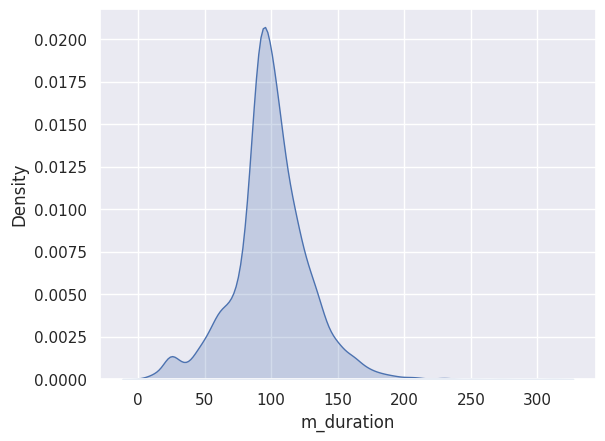

In [ ]:
sns.set(style="darkgrid")
sns.kdeplot(data=df_copy['m_duration'], shade=True)



---


### So, a good amount of movies on Netflix are among the duration of 75-120 mins. It is acceptable considering the fact that a fair amount of the audience cannot watch a 3.5 hour movie in one sitting. **Sorry Ranbir :(**


---



In [ ]:
df['duration']

0              90
1       2 Seasons
2        1 Season
3        1 Season
4       2 Seasons
          ...    
8802          158
8803    2 Seasons
8804           88
8805           88
8806          111
Name: duration, Length: 8794, dtype: object

In [ ]:
df1 = pd.read_csv("/content/netflix_titles1.csv")

In [ ]:
df1.head(6)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...


In [ ]:
df1['TV_duration'] = df1.query("type=='TV Show'")["duration"]
df1['TV_duration']

0             NaN
1       2 Seasons
2        1 Season
3        1 Season
4       2 Seasons
          ...    
8802          NaN
8803    2 Seasons
8804          NaN
8805          NaN
8806          NaN
Name: TV_duration, Length: 8807, dtype: object

In [256]:
df1 = df1.dropna(subset=['TV_duration'])

In [258]:
features=['title','TV_duration']
durations= df1[features]

durations['no_of_seasons']=durations['TV_duration'].str.replace(' Season','')
durations['no_of_seasons']=durations['no_of_seasons'].str.replace('s','')
durations['no_of_seasons']=durations['no_of_seasons'].astype(str).astype(int)


<ipython-input-258-411cdded79f8>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-258-411cdded79f8>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-258-411cdded79f8>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Axes: xlabel='title'>

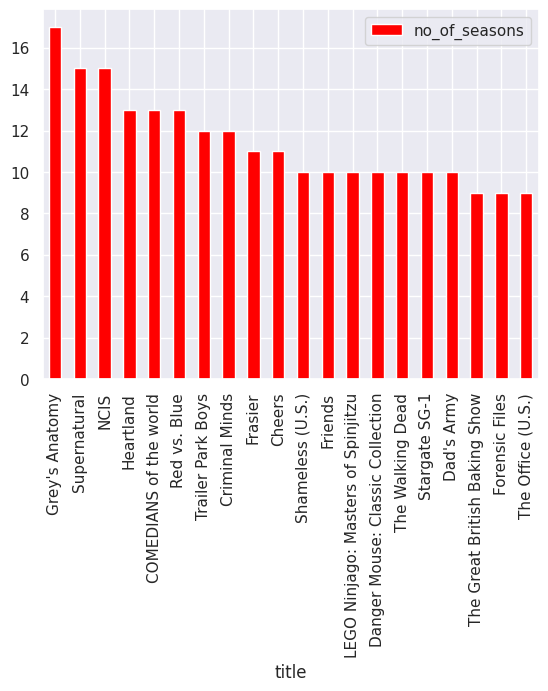

In [259]:
t=['title','no_of_seasons']
top=durations[t]

top=top.sort_values(by='no_of_seasons', ascending=False)
top20=top[0:20]
top20.plot(kind='bar',x='title',y='no_of_seasons', color='red')

In [260]:
from wordcloud import WordCloud

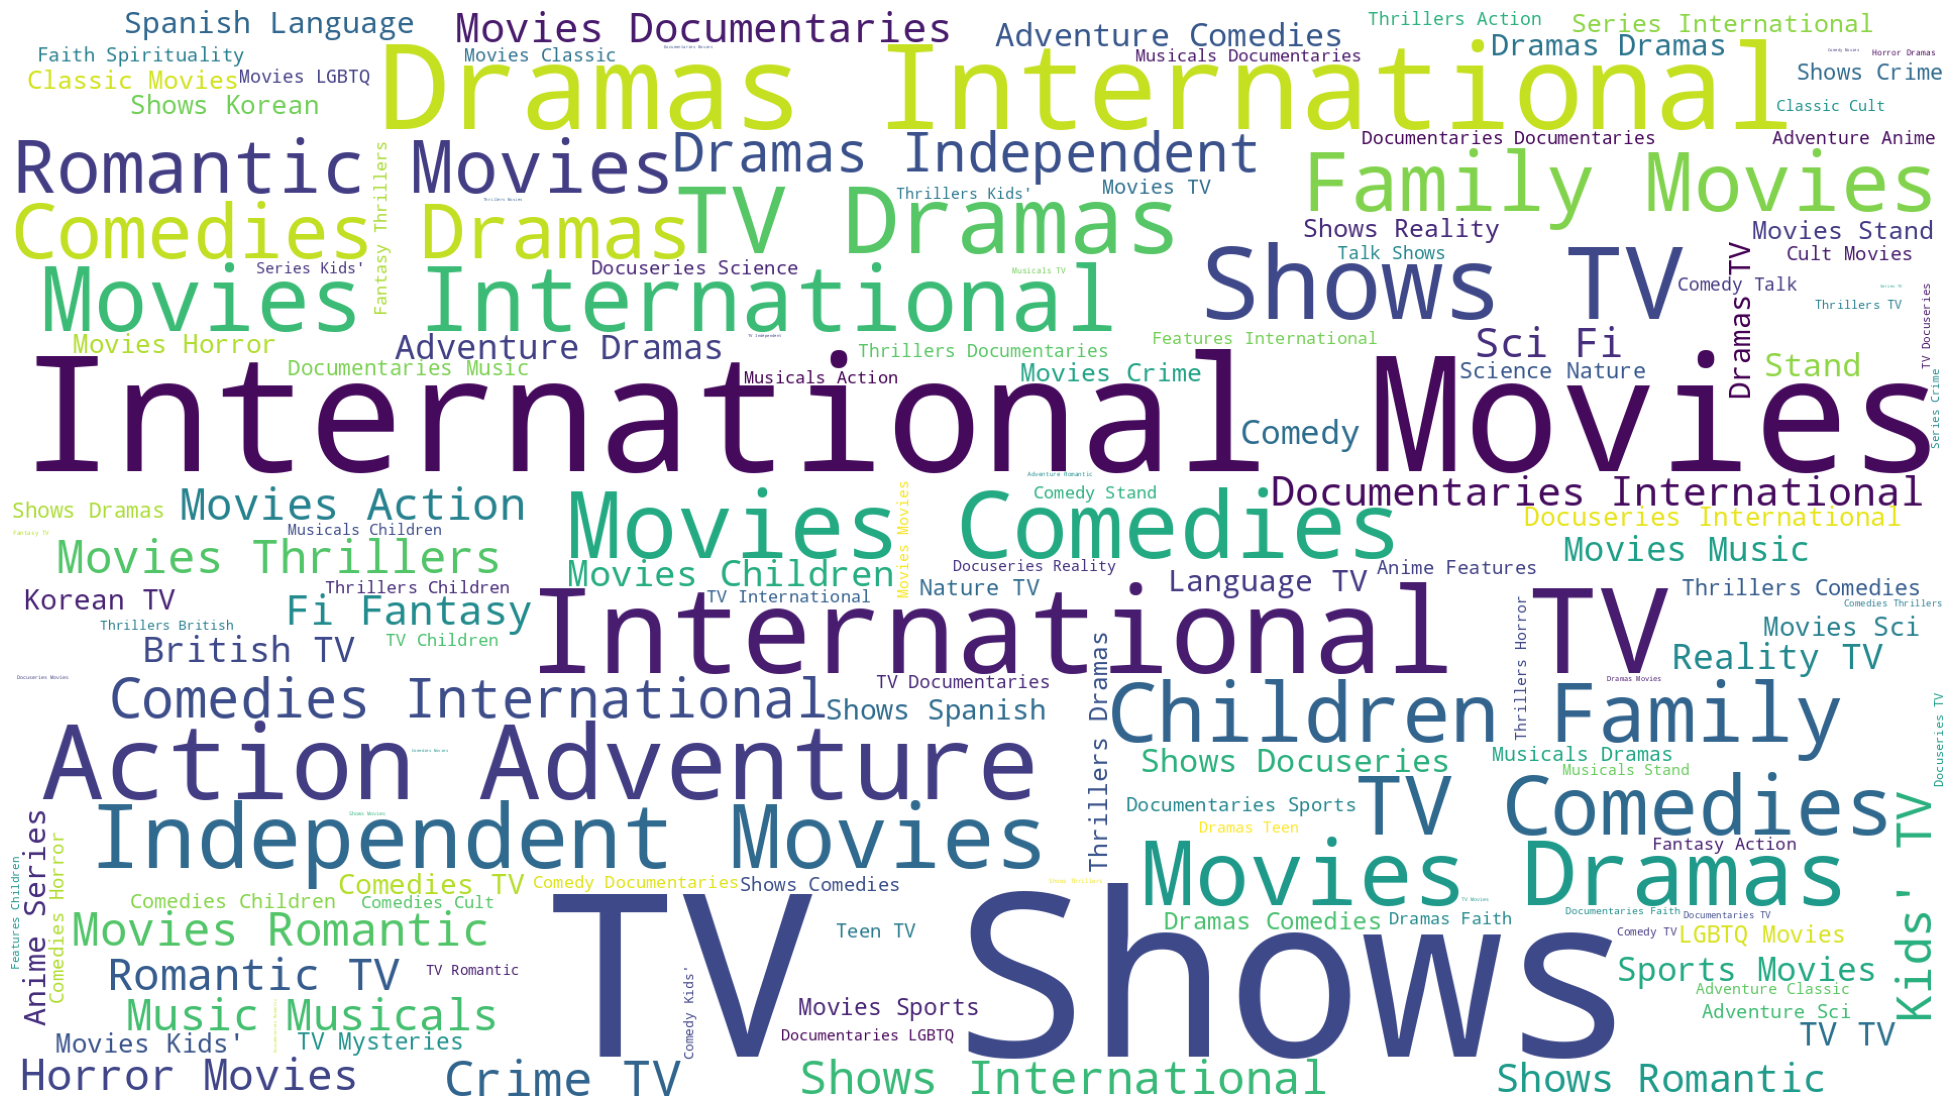

In [261]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.listed_in))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('category.png')
plt.show()

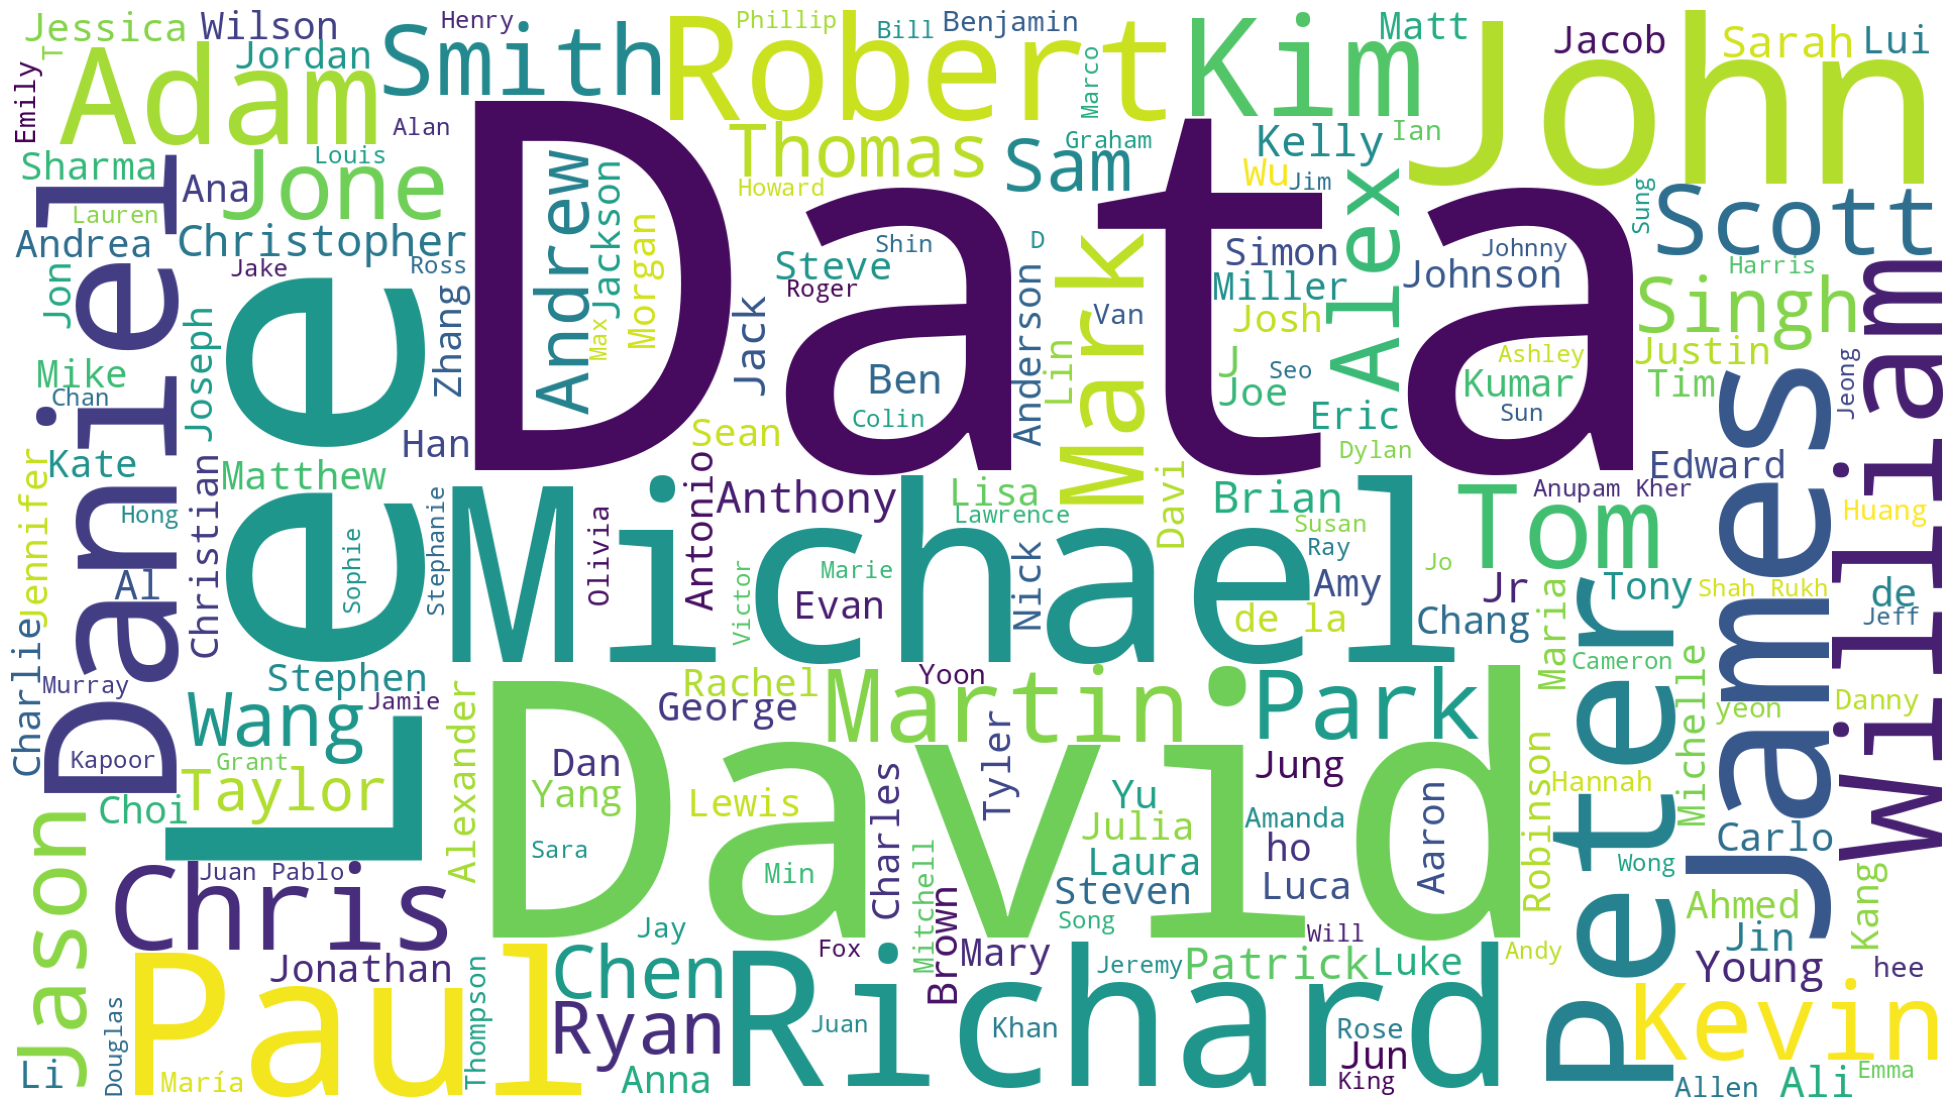

In [262]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.cast))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('cast.png')
plt.show()